# Introduction: Fusion Pore Expansion Energetics

Calculating the total energy of the system as before pore formation, after the initial pore forms, and as the pore expands.  This is basically putting numbers to my Welch Lab/Work/"Pore on bent membrane" page.

*Assume:*
- Negligible **tension**
- Protrusion membrane is static outside of pore's local area (ie pore expansion velocity >> protrusion shape changes)
- *As the pore expands, the membrane it replaces "disappears" into a stress-free bulk*.  I picture this as the membrane material flowing out from the region the pore replaces and pushing neighboring membrane such that an equivalent area is lost to a zero-stress bulk
- **$K_b$** of a double bilayer structure w/ a bridging pore $\approx K_b$ of a double bilayer structure w/ simple apposition $\approx 2 K_b$ of a *single* bilayer structure
- **Distance between membranes** is held constant.  This is *not* going to be what actually happens since the minimal E solution also has $R_t$ increasing (see Chizmadzhev, 1995), but it greatly simplifies our calculations for now and will [hopefully] give a ballparks of the energies.

My protrusion is a double bilayer bent into this shape: <br>
<img src="Imgs/protrusion_surface.jpg" width=300 /><br>
This is a piecewise surface of revolution wherein the base is a torus section, the body is a cylinder, and the cap is a hemisphere. 
Note that $z=0$ where the toroidal base's tangent plane is the xy plane.


Next, we need to designate some coordinates on this surface for the toroidal base.
System coordinates & parameters for the protrusion surface: <br>
<img src="Imgs/tor_base_coord.jpg" width=250 /> <img src="Imgs/tor_base_xsection.jpg" width=550 /><br>
An additional measure $L$ is the length of the protrusion measured from z=0 to the tip of the hemispherical cap.

System coordinates & parameters for the toroidal pore (neglecting membrane thickness and pore tilt, $\theta$, of 0): <br>
<img src="Imgs/pore_coord.jpg" width=250 /> <img src="Imgs/pore_xsection.jpg" width=550 /><br>
To make this more complete, we adapt Christoph & Rob's (2011) model of an inclined toroidal pore: <br>
<img src="Imgs/inclined_pore2_background.jpg" width=250 /> <br>
Note that UPPERCASE letters and the beginning of the Greek alphabet are used for the protrusion itself while lowercase letters and the end of the Greek alphabet are used for the pore.

***
# Set-up

In [1]:
import numpy as np
import sympy as sp
import plotly.graph_objs as go

# ---------------------------------------------------------------------
# Global system properties 
# ---------------------------------------------------------------------

# System properties: protrusion & bilayer
R0 = 375 # Radius of the protrusion's cylindrical body; in nm
L = 5000 # Protrusion length; in nm
KbPore = 15 # Bending constant of a generic bilayer; in kT
KbProtr = KbPore*2  # Bending constant of the double-membrane protrusion; in kT
    # Crude estimation that treats the double-bilayer structure as single unit
H0 = 0 # Membrane spontaneous curvature; in 1/nm
h = 7.5 # Bilayer thickness; in nm

# System properties: pore
rt = 1 # Radius of "fold" to form pore rim as meas from inner monolayer surface; in nm
    # ~Upper limit of intermembr distance for spontaneous fusion
m = h+rt # Distance b/w outer leaflet & intermembrane midplane; nm

# ---------------------------------------------------------------------
# Key equations/fxns for G calculation
# ---------------------------------------------------------------------
def helfrichStress(k1,k2,Kb):
    '''
    Helfrich bending *stress*
    
    Args:
        k1: (float) Principal curvature 1; 1/nm
        k2: (float) Principal curvature 2; 1/nm
        Kb: (float) Helfrich bending constant for membrane; kT
    Returns:
        (float) The Helfrich bending *stress* (ie energy for an infinitesimal dA) 
    '''
    return 0.5*Kb*(k1+k2)**2 # Note units = energy/unit area = kT/nm^2

def xi(r0,theta):
    '''
    Core function as defined in Christoph's paper
    
    Args:
        r0: (float) fusion pore radius meas from intermembrane midplane; nm
        theta: (float) pore incline angle; radians
    Returns:
        (float) Val of fxn xi from Christoph's paper
    '''
    return (r0 + m*np.cos(theta))/rt;
            
def W(wXi,theta):
    '''
    Core function as defined in Christoph's paper
    
    Args:
        wXi: (float) Relevant value of xi
        theta: (float) pore incline angle; radians
    Returns:
        (float) Val of fxn W from Christoph's paper
    '''
    xiSqr = wXi**2
    sqrtXiSqr = np.sqrt(xiSqr - 1)
    
    return ( (2*xiSqr)/sqrtXiSqr * (np.arctan((np.tan(theta/2 + np.pi/4) * sqrtXiSqr)/(wXi-1))
            - np.arctan((np.tan(theta/2) * sqrtXiSqr)/(wXi-1))) )

def T(tXi,theta):
    '''
    Core function as defined in Christoph's paper
    
    Args:
        tXi: (float) Relevant value of xi
        theta: (float) pore incline angle; radians
    Returns:
        (float) Val of fxn T from Christoph's paper
    '''
    cosTheta = np.cos(theta)
    
    return ( -4*cosTheta - H0*rt*(np.pi*tXi - 4*cosTheta)
            + H0**2 * rt**2 * (np.pi*tXi/2 - cosTheta) )

def GPore(r0,theta,Kb):
    '''
    Calculates energy of an inclined toroidal fusion pore from Christoph's 2011 paper
    
    Args:
        r0: (float) fusion pore radius meas from intermembrane midplane; nm
        theta: (float) The angle of pore incline; radians
        Kb: (float) Helfrich bending constant for membrane; kT
    Returns:
        (float) The bending energy for an inclined toroidal pore; units set by Kb
    '''
    thisXi = xi(r0,theta)
    
    return np.pi * Kb * (W(thisXi,theta) + W(thisXi,-theta) + 2*T(thisXi,theta))

print("done")

done


# Pore at hemispherical tip
For modeling simplicity (ie symmetry), I'll stick the pore at the very end of the protrusion where the hemispherical cap comes to its apex.  Thus, this is essentially just the pore at the apex of a hemisphere.  

I could track the pore expansion until it consumes the whole cap.  However, my assumption of constant (!= uniform) distance b/w membranes will probably start to cause major deviations at that point.  I'll restrict my analysis to ~50 nm since Chizmadzhev et al (1995) found that total pore E starts decreasing after that point due to alleviation of bending stress via intermembrane distance widening.

*Assume:*
- Membrane is locally conical around pore
- Radially symmetric expansion of the pore since it's at the pole of a uniformly stressed hemisphere 

The total system energy is simply the combined bending energies $G_pore + G_cap$.  We can calculate the pore energy from Christoph's solution to the inclined toroidal pore as set up above.  Using the assumptions above, the cap stress profile will be held uniform and static so $G_cap$ is just the stress times whatever cap area remains as the pore expands.  
To find the remaining cap area as the pore expands, we use the solution to Archimedes's hat-box:<br>
<img src='Imgs/sphere_belt_area.jpg' width=400> <br>
The area of the light blue belt is equal to the area of the vertical walls of cylinder on the right.  Thus,
    $A = 2\pi r h$,
or in my standardized notation: <br>
    $A = 2\pi R_0 h_{band}$
    
To find $h$, we need to examine the pore and do some trig. <br>
<img src='Imgs/protrusion_pore_tilt.jpg' width=250> <br>
From 'Inclined fusion pore.ipynb', we know: <br>
    $\theta = arcsin(\frac{r_0}{R_0})$ <br>
where $r_0$ is the pore radius and $R_0$ is the protrusion radius.  Knowing $\theta$, we can find $h$: <br>
    $h_{band} = R_0 cos(\theta) = \frac{r}{tan(\theta)}$

Additionally, the pore energy will be graphed over the "effective pore radius", $r_{eff}$.  This is defined as the minimum pore radius for a given $\theta$ and is depicted below: <br>
<img src='Imgs/inclined_pore_r_eff.jpg' width=250> <br>
From the image above, we find that $r_{eff}$ is related to $r_0$ by the equation: <br>
$r_0 = r_e + c = r_e + m - m cos(\theta) = r_e + m (1 - cos(\theta))$

nStep =  501
hBand( 1 ) =  374.9999866666664
hBand( 2 ) =  374.9999466666629
hBand( 3 ) =  374.9998799999808
hBand( 4 ) =  374.999786666606
hBand( 5 ) =  374.9996666665185
hBand( 6 ) =  374.9995199996928
hBand( 7 ) =  374.9993466660975
hBand( 8 ) =  374.9991466656957
hBand( 9 ) =  374.9989199984448
hBand( 10 ) =  374.99866666429625
hBand( 11 ) =  374.9983866631962
hBand( 12 ) =  374.99807999508477
hBand( 13 ) =  374.9977466598966
hBand( 14 ) =  374.9973866575606
hBand( 15 ) =  374.9969999879999
hBand( 16 ) =  374.9965866511321
hBand( 17 ) =  374.9961466468689
hBand( 18 ) =  374.9956799751165
hBand( 19 ) =  374.9951866357754
hBand( 20 ) =  374.9946666287402
hBand( 21 ) =  374.99411995390005
hBand( 22 ) =  374.99354661113836
hBand( 23 ) =  374.99294660033274
hBand( 24 ) =  374.9923199213552
hBand( 25 ) =  374.99166657407204
hBand( 26 ) =  374.9909865583438
hBand( 27 ) =  374.99027987402553
hBand( 28 ) =  374.98954652096637
hBand( 29 ) =  374.98878649900985
hBand( 30 ) =  374.987999807993

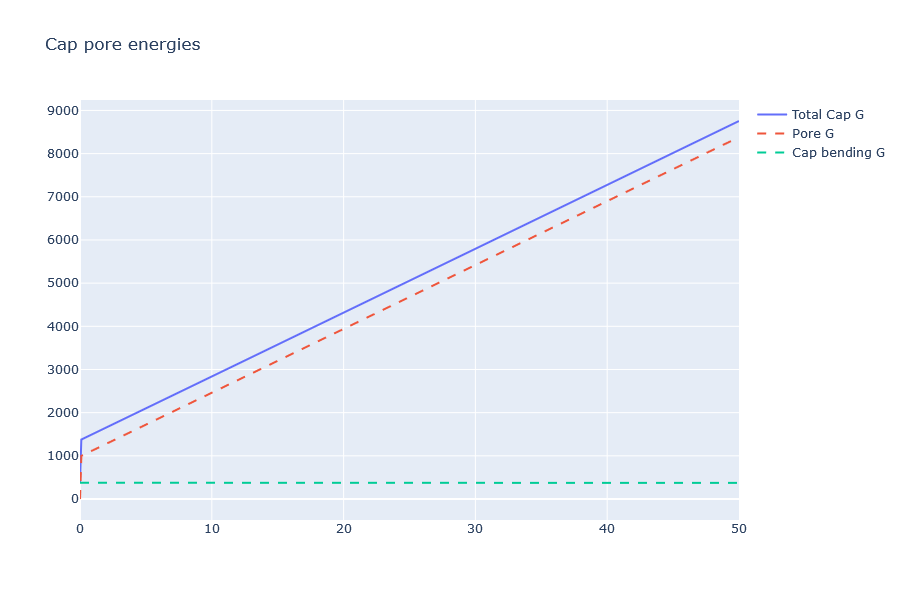

done


In [10]:
# ---------------------------------------------------------------------
# Computation: bending energy of the initial hemispherical tip
# ---------------------------------------------------------------------

# Sim param
stepSize = 0.1 # Step size of pore radius dilation; nm
max_r = 50 # Maximum pore radius to do computations for; nm
nStep = int(np.ceil(max_r/stepSize + 1)) # Num steps to take
    # +1 so that I preserve num of steps after adding initial values
print("nStep = ",nStep)

# Set up the arrays of length nStep to hold my computations
GCap = [None]*nStep # Bending *energy* of all the non-pore membrane in the cap; kT
GCapPore = [None]*nStep # Energy of the fusion pore (Helfrich bending only); kT
GTotCap = [None]*nStep # Total Gb of cap = GCap + GCapPore; kT
rEffCap = np.linspace(0,max_r,num=nStep) # Effective radius of pore; nm
    # This is the pore radius at the narrowest point which < r0 if theta != 0
    # Note: linspace is start and end point inclusive by default. 
    # Thus there are nStep-2 evenly spaced points in the open interval (0,max_r)

# Set/Compute initial conditions for referencing in computations
stressCap = helfrichStress(1/R0,1/R0,KbProtr) # The static, uniform stress of the cap membrane
GCap[0] = 2*np.pi*(R0**2) * stressCap # Init Gb of cap; kT
    # is ACap * CapStress where ACap == SA of a hemisphere of radius R
GCapPore[0] = 0
GTotCap[0] = GCap[0]+GCapPore[0]

# Find GCap, GCapPore, and thus GTotCap for each value of rCapPore
for i in range(1,nStep):
    #Vars for each iteration of loop
    theta = np.arcsin(rEffCap[i]/R0) # Angle of pore incline == angle from z axis; radians
        # For theta, neglect difference b/w r0 and rEffCap[i]
    r0 = rEffCap[i] + m*(1-np.cos(theta)) # r0 as defined in the figures in the set-up
        # What we actually plug into Christoph & Rob's solution
    hBand = R0*np.cos(theta)
    #print("hBand(",i,") = ",hBand)
    
    # Find Gb of cap
    A = 2*np.pi*R0*hBand # Area of remaining cap
    GCap[i] = A*stressCap
    
    # Find Gb of the inclined pore
    GCapPore[i] = GPore(r0,theta,KbPore)
    
    GTotCap[i] = GCap[i]+GCapPore[i]

print("rEffCap = ",rEffCap[0])
print('GCap = ',GCap[0])
print('GCapPore = ',GCapPore[0])
print('GTotCap = ',GTotCap[0])
print('\n')
print("rEffCap = ",rEffCap[1])
print('GCap = ',GCap[1])
print('GCapPore = ',GCapPore[1])
print('GTotCap = ',GTotCap[1])
print('\n')
print("rEffCap = ",rEffCap[nStep-1])
print('GCap = ',GCap[nStep-1])
print('GCapPore = ',GCapPore[nStep-1])
print('GTotCap = ',GTotCap[nStep-1])

# ---------------------------------------------------------------------
# Graph the results for the cap pore
# ---------------------------------------------------------------------
capGraph = go.Figure()
capGraph.add_trace(go.Scatter(x=rEffCap, y=GTotCap, name=r"Total Cap G",
                        mode='lines'))
capGraph.add_trace(go.Scatter(x=rEffCap, y=GCapPore, name=r"Pore G",
                        line=dict(dash='dash'),
                        mode='lines'))
capGraph.add_trace(go.Scatter(x=rEffCap, y=GCap, name=r"Cap bending G",
                        line=dict(dash='dash'),
                        mode='lines'))
# Some quick figure styling
capGraph.update_layout(title="Cap pore energies",
                  xaxis_title=r"$r_eff$", yaxis_title=r"$G (K_b)$",
                  autosize=False, width=600, height=600)
capGraph.show()

print('done')

# Pore in toroidal base

Ignore this for now

*Note: My definition for $\beta$ is shifted by $\pi$ radians from the one used to derive the curvature.  Therefore, I need to recalculate the curvature to shift the angle I plug in forward by $\pi$ radians.*

In [ ]:
# System properties
# R, the radius of protrusion's cylindrical body, is defined as in the first section
#rt = 200 # Radius of the torus tube/circle revolved around z for the base; in nm

# Model curvatures
#krt = 1/rt # Curvature from the circle revolved about z to make the torus

#def kT(z):
    '''
    Curvature as beta changes (moving around the minor circle of the tube)
    
    Args:
        z: (float) The distance from the torus floor
    Returns:
        (float) The curvature from the torus's minor ring
    '''
    #return np.sqrt(1 - ((rt - z)/rt)**2)/(R + rt + rt np.sqrt(1 - ((rt - z)/rt)**2))

# References

- CA Haselwandter & R Phillips. Elastic energy of polyhedral bilayer vesicles. *Phys Rev E*. 83:061901 (2011). [DOI 10.1103/PhysRevE.83.061901](http://dx.doi.org/10.1103/PhysRevE.83.061901)
- YA Chizmadzhev, FS Cohen, A Shcherbakov, J Zimmerberg. Membrane mechanics can account for fusion pore dilation in stages. *Biophys J*. 69:2489-2500 (1995). [DOI 10.1016/S0006-3495(95)80119-0](https://doi.org/10.1016/S0006-3495(95)80119-0)